In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

            Price   Open   High    Low     Vol. Change %
Date                                                    
2018-01-02  43.06  42.54  43.08  42.31  102.22M    1.77%
2018-01-03  43.06  43.13  43.64  42.99  118.07M    0.00%
2018-01-04  43.26  43.13  43.37  43.02   89.74M    0.46%
2018-01-05  43.75  43.36  43.84  43.26   94.64M    1.13%
2018-01-08  43.59  43.59  43.90  43.48   82.27M   -0.37%


In [13]:

# 2.  chia train test validate theo tỉ lệ 8:2
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều



In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 1, 'gamma': 'scale'}
Best score: 11.496006830578848


In [16]:

# lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )


y_pred = svr_rbf.predict(x_test)
y_pred


array([141.77553159, 144.87599627, 146.01190109, 146.16837812,
       141.80518555, 140.60705858, 140.07095448, 139.0858165 ,
       142.28917052, 143.2059238 , 141.60744348, 145.34635023,
       143.62902257, 144.55234029, 146.47142925, 148.79391776,
       150.99643236, 150.50909601, 147.64320001, 155.89814352,
       152.70369618, 153.88664046, 150.68452409, 141.50852905,
       141.37989679, 137.87776663, 140.15043257, 137.2771358 ,
       145.51282088, 148.57945749, 148.8426549 , 152.06918374,
       148.44296682, 150.01209898, 151.20115406, 148.93037853,
       148.9791122 , 150.35316916, 147.4773115 , 145.28758209,
       143.49132161, 147.32115052, 147.7212542 , 146.61801133,
       149.46639722, 145.93364567, 142.07195537, 142.22007139,
       144.23825622, 143.18623312, 148.5404615 , 145.29737729,
       140.51776861, 136.3742717 , 133.90577411, 131.93169939,
       135.52961241, 133.25866531, 131.07938336, 130.06358962,
       129.67733525, 129.11809697, 128.57903856, 129.54

In [17]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[195.69]])

In [18]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([187.53548349]),
 array([184.17919946]),
 array([181.78847889]),
 array([179.82642563]),
 array([178.09018653]),
 array([176.47891652]),
 array([174.93433957]),
 array([173.41957175]),
 array([171.91015266]),
 array([170.38986652]),
 array([168.84869168]),
 array([167.28173456]),
 array([165.68856679]),
 array([164.0726298]),
 array([162.44051516]),
 array([160.8010475]),
 array([159.16420681]),
 array([157.54001081]),
 array([155.93751504]),
 array([154.3640653]),
 array([152.82487247]),
 array([151.32290221]),
 array([149.85901369]),
 array([148.43225533]),
 array([147.04022954]),
 array([145.67945974]),
 array([144.34571909]),
 array([143.03430293]),
 array([141.7402429]),
 array([140.45846956])]

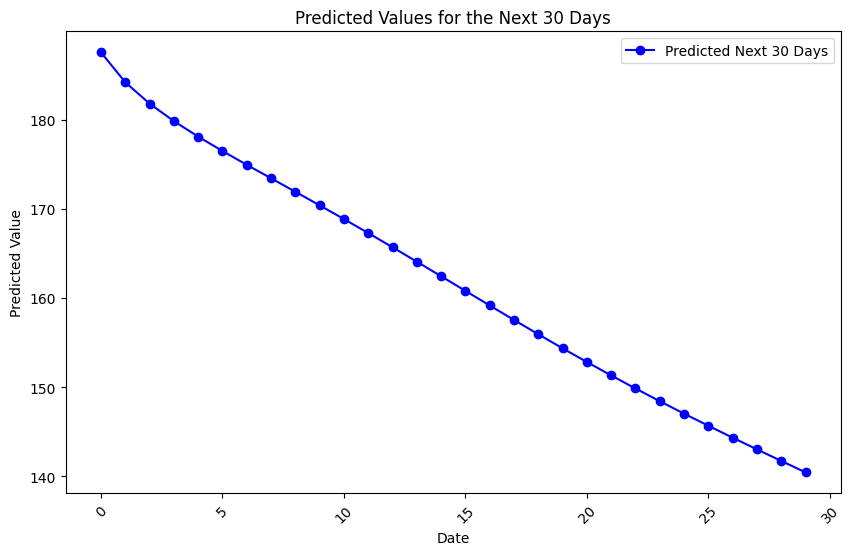

In [19]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [20]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 2.65488155313147
Testing MAPE: 0.010810351123779798
Testing MAE: 1.8599569746814604


In [21]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 2.4607823889951668
Testing MAPE: 0.010402501125733122
Testing MAE: 1.7818356232194539


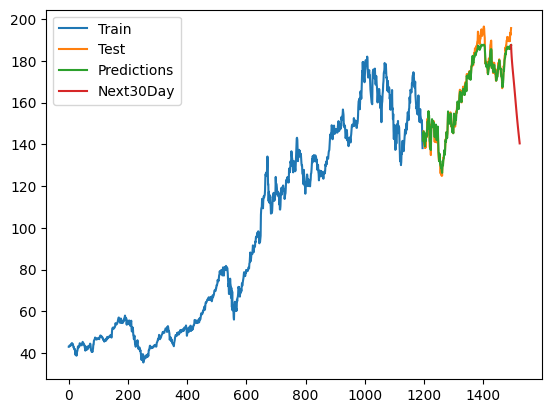

In [22]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()